<a href="https://colab.research.google.com/github/kenneth-003/Kiwanukakenneth/blob/main/KIWANUKA_KENNETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


In [84]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# view the shape of the dataset
mnist.data.shape

(70000, 784)

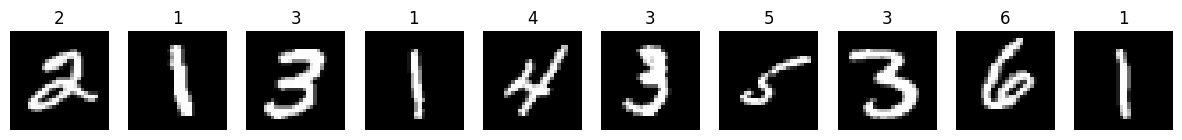

In [86]:
import matplotlib.pyplot as plt
import numpy as np

#digits in one row
n_digits = 10

# choosing the desired starting index
start_index = 5

# set up figure
plt.figure(figsize=(15, 3))

for i in range(n_digits):
    # pick row from dataset
    digit = mnist.data.iloc[start_index + i]
    label = mnist.target.iloc[start_index + i]

    # reshape to 28x28
    digit_image = np.array(digit).reshape(28, 28)

    # plot in subplot
    plt.subplot(1, n_digits, i + 1)
    plt.imshow(digit_image, cmap="gray")
    plt.title(f"{label}")
    plt.axis("off")

plt.show()



In [87]:
#Using PCA for KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [88]:
#Forming the Target column and the Feature column
#target column be y
y = mnist.target.astype(int)
#Feature column be x
x = mnist.data


In [89]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [90]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#Train_test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
# train_test sizes
print(f"Training set size: {len(x_train)}")
print(f"Testing set size: {len(x_test)}")

Training set size: 56000
Testing set size: 14000


In [93]:
# Applying the StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [94]:
#Apply PCA
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [95]:
# KNN for modeling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)


KNeighborsClassifier()

Accuracy: 0.9497

Confusion Matrix:



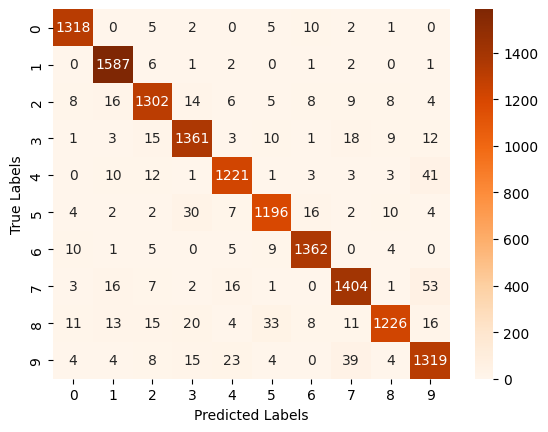

CPU times: user 25.1 s, sys: 25.8 ms, total: 25.1 s
Wall time: 25.3 s


In [96]:
#cell magic
%%time

# Train KNN with PCA
# Make predictions on the test set
y_pred = knn.predict(x_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [103]:
#Accurancy score
print(f"Accuracy score: {accuracy:.4f}")

Accuracy score: 0.9497


In [97]:
# displaying a Classification report in DataFrame form

print("\nClassification Report:\n")
import pandas as pd
# assume y_true and y_pred are defined
class_report = classification_report(y_test, y_pred, output_dict=True)
# convert to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df



Classification Report:



,precision,recall,f1-score,support
0,0.969831,0.981385,0.975574,1343.000000
1,0.960654,0.991875,0.976015,1600.000000
2,0.945534,0.943478,0.944505,1380.000000
3,0.941217,0.949756,0.945467,1433.000000
4,0.948718,0.942857,0.945778,1295.000000
5,0.946203,0.939513,0.942846,1273.000000
6,0.966643,0.975645,0.971123,1396.000000
7,0.942282,0.934132,0.938189,1503.000000
8,0.968404,0.903464,0.934807,1357.000000
9,0.909655,0.928873,0.919164,1420.000000


In [98]:
# Time taken by the model to predict
import time
start_time = time.time()
y_pred = knn.predict(x_test_pca)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

Prediction time: 24.8674 seconds


In [99]:
#Using KNN without PCA

Accuracy without PCA: 0.9458

Confusion Matrix without PCA:


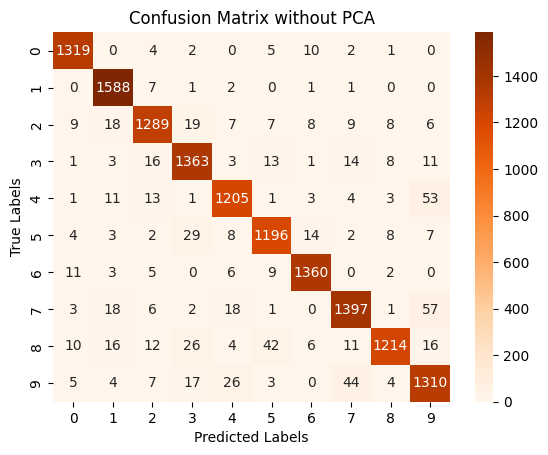


Classification Report without PCA:
CPU times: user 52.6 s, sys: 147 ms, total: 52.7 s
Wall time: 53.3 s


,precision,recall,f1-score,support
0,0.967718,0.982130,0.974871,1343.000000
1,0.954327,0.992500,0.973039,1600.000000
2,0.947098,0.934058,0.940533,1380.000000
3,0.933562,0.951151,0.942274,1433.000000
4,0.942142,0.930502,0.936286,1295.000000
5,0.936570,0.939513,0.938039,1273.000000
6,0.969351,0.974212,0.971776,1396.000000
7,0.941375,0.929474,0.935387,1503.000000
8,0.971978,0.894620,0.931696,1357.000000
9,0.897260,0.922535,0.909722,1420.000000


In [100]:
#cell magic
%%time
# Train KNN without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_no_pca = knn_no_pca.predict(x_test_scaled)

# Evaluate the model
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
conf_matrix_no_pca = confusion_matrix(y_test, y_pred_no_pca)
class_report_no_pca = classification_report(y_test, y_pred_no_pca)

print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print("\nConfusion Matrix without PCA:")
sns.heatmap(conf_matrix_no_pca, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix without PCA")
plt.show()
print("\nClassification Report without PCA:")
class_report_no_pca = classification_report(y_test, y_pred_no_pca, output_dict=True)
class_report_no_pca_df = pd.DataFrame(class_report_no_pca).transpose()
class_report_no_pca_df

In [101]:
#time
import time
start_time = time.time()
y_pred_no_pca = knn_no_pca.predict(x_test_scaled)
end_time = time.time()
prediction_time_no_pca = end_time - start_time
print(f"Prediction time without PCA: {prediction_time_no_pca:.4f} seconds")

Prediction time without PCA: 52.1317 seconds



* **Which model performed the best on the test set?**

  The model with the application of PCA performed best with the time

  Prediction time: **24.8674 seconds**

 Accuracy score: **0.9497**


* **Which model was the fastest at making predictions?**

 The with the application of PCA had the fastest prediction
